<div align="center">
<img src="https://radcolombia.org/web/sites/default/files/archivos/instituciones/universidad-bosque/logo-ub.png" width="500"/>

### Facultad de Ciencias
### Maestría en Estadística Aplicada y Ciencia de Datos


# ***"Despliegue Modelo VGG16 para Cifrar10 Desde HuggingFace"***
### *Proyecto Final GCP*
</div>

# Carga de Modelo Entrenado

In [1]:
from huggingface_hub import from_pretrained_keras
new_model = from_pretrained_keras("2Nisavi2/Cifrar_10_Deployment")

c:\Users\Usuario\anaconda3\envs\EjAd\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
config.json not found in HuggingFace Hub.
Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]


To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
Fetching 6 files:  33%|███▎      | 2/6 [00:00<00:01,  2.84it/s]


Fetching 6 files:  67%|██████▋   | 4/6 [00:01<00:00,  2.74it/s]































Fetching 6 files: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]


# Lista de Labels

In [2]:
import pandas as pd
##Labels
label = pd.DataFrame({'cat':['Avión','Auto','Ave','Gato','Ciervo','Perro','Rana','Caballo','Oveja','Camión']})
label

cat
0    Avión
1     Auto
2      Ave
3     Gato
4   Ciervo
5    Perro
6     Rana
7  Caballo
8    Oveja
9   Camión

In [3]:
lab = label['cat']
lab

0      Avión
1       Auto
2        Ave
3       Gato
4     Ciervo
5      Perro
6       Rana
7    Caballo
8      Oveja
9     Camión
Name: cat, dtype: object

# Función Base para Proceso de Predicción

In [13]:
from numpy import asarray
import numpy as np

def reshape(inp):
    inp = inp.resize((32, 32))
    x = asarray(inp)/255
    x = np.reshape(x, (1, 32, 32, 3))
    pred = new_model.predict(x)
    pred = pd.Series(pred[0])
    pred_list = {lab[i]: float(pred[i]) for i in range(9)}
    pred_list
    return pred_list

# Prueba de Predicción

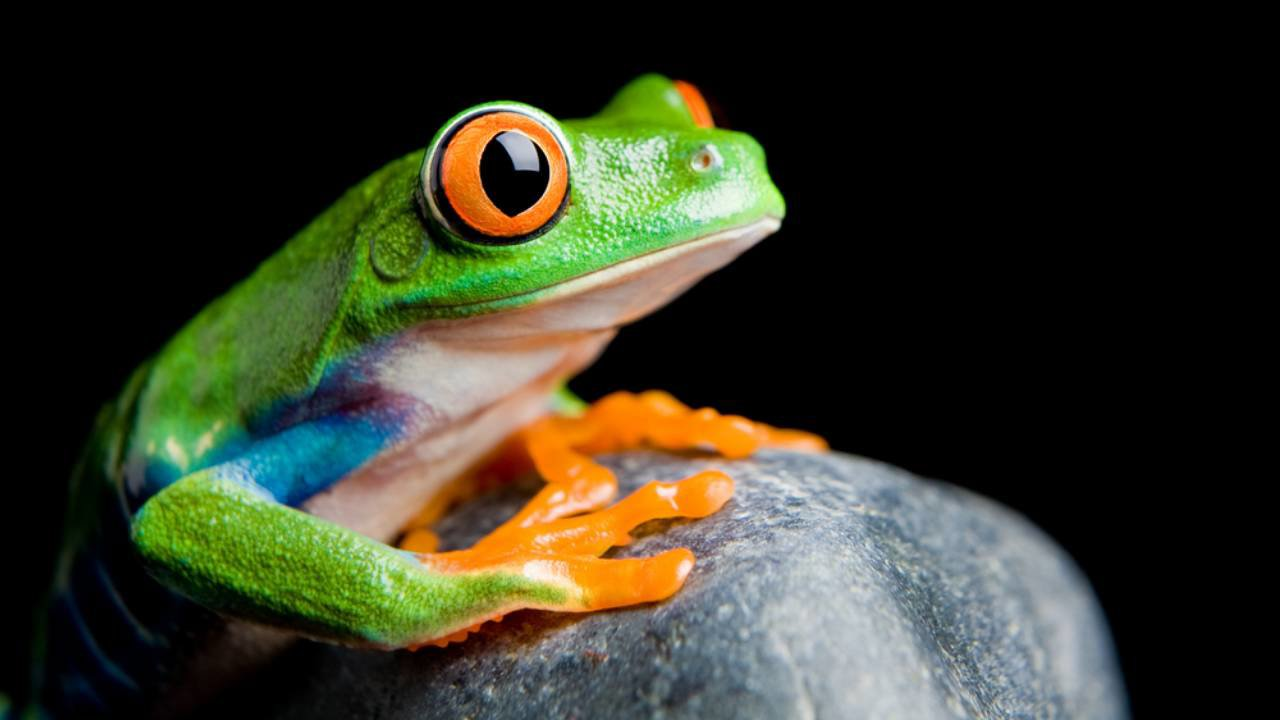

In [14]:
import requests
from io import BytesIO
from PIL import Image

res = requests.get('https://www.nationalgeographic.com.es/medio/2022/12/12/rana-1_66a9a5c8_221212161515_1280x720.jpg')
img = Image.open(BytesIO(res.content))
img

In [15]:
reshape(img)

1/1 [==============================] - 8s 8s/step


{'Avión': 6.542994939525305e-15,
 'Auto': 1.09285906713108e-10,
 'Ave': 4.672475600875359e-11,
 'Gato': 7.747564728980381e-15,
 'Ciervo': 1.0387491139864178e-15,
 'Perro': 5.024023460708377e-15,
 'Rana': 1.0,
 'Caballo': 1.833264324445057e-15,
 'Oveja': 2.8026523159543903e-13}

# Despliegue en Gradio

In [16]:
import gradio as gr

def reshape(inp):
    x = asarray(inp)/255
    x = np.reshape(x, (1, 32, 32, 3))
    pred = new_model.predict(x)
    pred = pd.Series(pred[0])
    pred_list = {lab[i]: float(pred[i]) for i in range(9)}
    pred_list
    return pred_list

gr.Interface(fn=reshape, 
             inputs=gr.Image(shape=(32, 32)),
             outputs=gr.Label(num_top_classes=10)).launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://262e79c216bb1688e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
